In [2]:
import pandas as pd
df = pd.read_csv("/content/sample_data/Copper_Set.csv", encoding='unicode_escape')
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [3]:
print(len(df['item_date'].unique()))
print(len(df['customer'].unique()))
print(len(df['material_ref'].unique()))
print(len(df['product_ref'].unique()))
print(len(df['delivery date'].unique()))

253
1170
16564
33
29


In [4]:
df.shape

(181673, 14)

In [5]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [7]:
#What does error =' coerce do?
#If 'coerce', then invalid parsing will be set as NaN. If 'ignore', then invalid parsing will return the input.
#What does errors coerce mean in pandas?
#We are also specifying the errors='coerce' parameter, which tells Pandas to replace any value that cannot
#be converted to a numeric data type with NaN . After running this code, we can check the data type of the
#Age column using the dtype attribute
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [8]:
df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,104991,1668701718,2021-04-01,1047.0


In [9]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64


In [10]:
print(df.shape)

(181673, 14)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


In [12]:
#Dealing with Missing Values
#  fillna() function is used to fill Pandas NA/NaN values using the specified method.
df['material_ref'].fillna('unknown', inplace=True)
df = df.dropna()

In [13]:
missing_values_count = df.isnull().sum()
print(missing_values_count)
print(df.shape)

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64
(181631, 14)


In [14]:
"""What does copy () do in Pandas?
Pandas DataFrame copy() Method

The copy() method returns a copy of the DataFrame. By default,
the copy is a "deep copy" meaning that any changes made in the original DataFrame will NOT be reflected in the copy."""

df_p=df.copy()

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

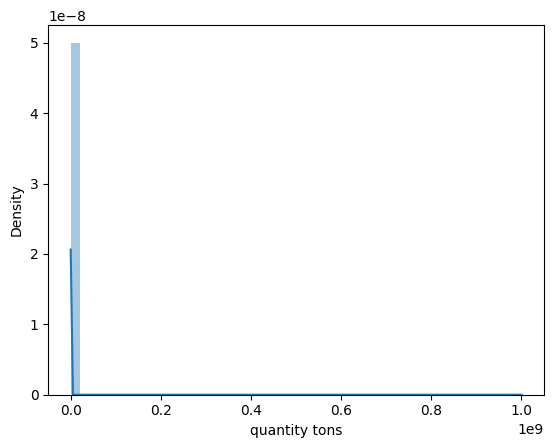

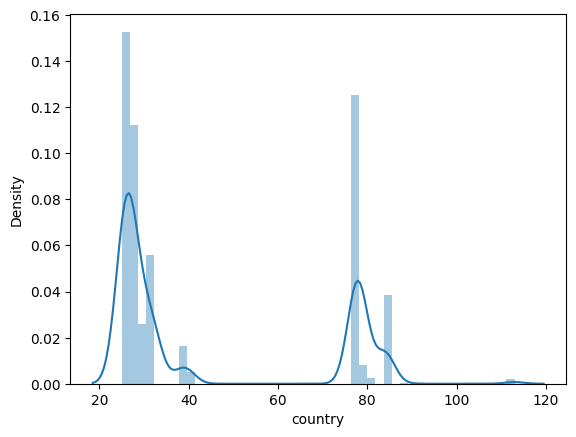

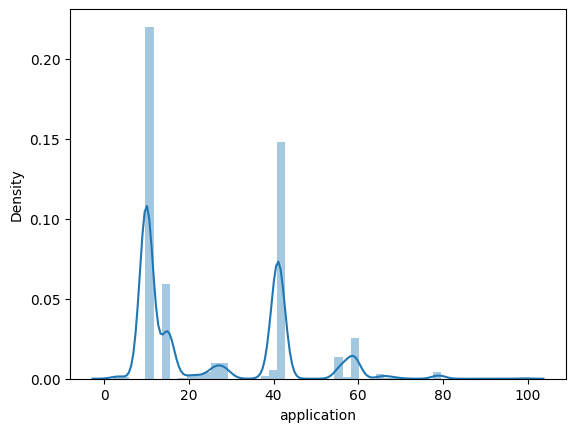

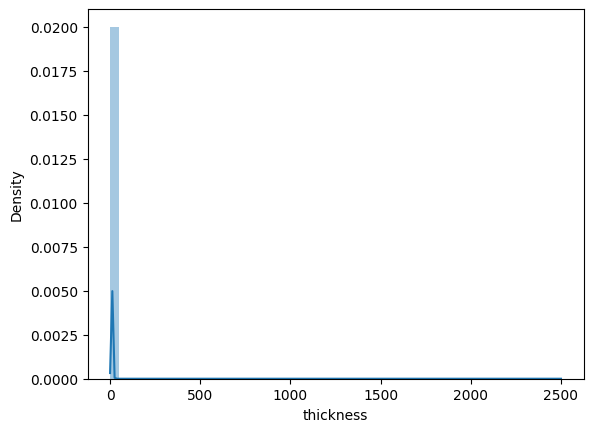

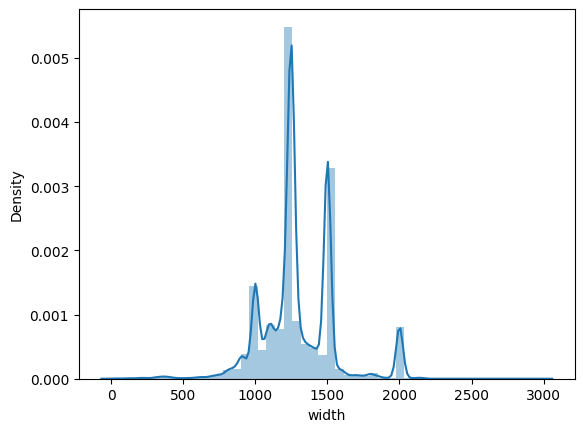

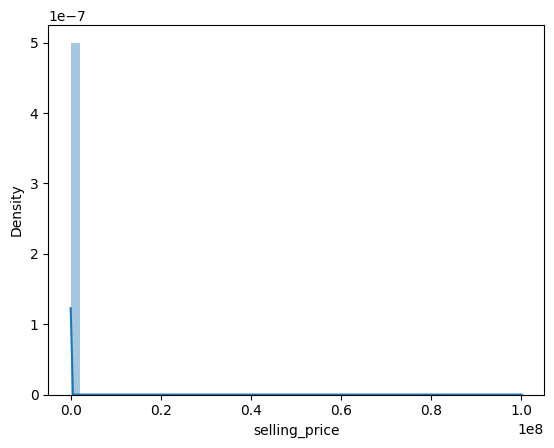

In [16]:
df_p['quantity tons']
sns.distplot(df_p['quantity tons'])
plt.show()
df_p['country']
sns.distplot(df_p['country'])
plt.show()
df_p['application']
sns.distplot(df_p['application'])
plt.show()
df_p['thickness']
sns.distplot(df_p['thickness'])
plt.show()
df_p['width']
sns.distplot(df_p['width'])
plt.show()
df_p['selling_price']
sns.distplot(df_p['selling_price'])
plt.show()

In [17]:
"""What is the mask for NaN in pandas?
To mask and replace NaNs with a specific value, use the index.
 putmask() method. Within that, set the index. isna() method."""

import numpy as np
mask1 = df_p['selling_price'] <= 0
print(mask1.sum())

7


In [18]:
df_p.loc[mask1, 'selling_price'] = np.nan
mask1 = df_p['selling_price'] <= 0
print(mask1.sum())


0


In [19]:
mask1 = df_p['quantity tons'] <= 0
print(mask1.sum())

4


In [20]:
df_p.loc[mask1, 'quantity tons'] = np.nan
mask1 = df_p['quantity tons'] <= 0
print(mask1.sum())


0


In [21]:
mask1 = df_p['thickness'] <= 0
print(mask1.sum())

0


In [22]:
df_p.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [ ]:
"""If you set inplace = True , the dropna method will modify your DataFrame directly.
That means that if you set inplace = True , dropna will drop all missing values from your original dataset."""

'If you set inplace = True , the dropna method will modify your DataFrame directly.\nThat means that if you set inplace = True , dropna will drop all missing values from your original dataset.'

In [23]:
df_p.dropna(inplace=True)
len(df_p)

181620

In [24]:
a = 181631 - 181620
print(a)

11


In [ ]:
"""What does SNS Distplot do in Python?
Python Seaborn module contains various functions to plot the data and depict the data variations.
The seaborn. distplot() function is used to plot the distplot. The distplot represents
 the univariate distribution of data i.e. data distribution of a variable against the density distribution."""
"""What is distplot in seaborn?
Displot. It is used basically for univariant set of observations and visualizes it through a histogram
 i.e. only one observation and hence we choose one particular column of the dataset."""

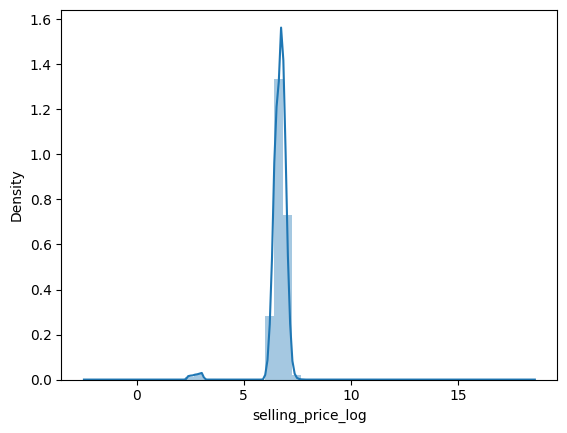

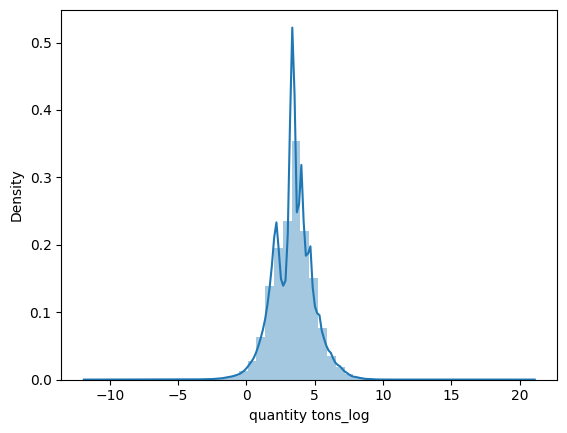

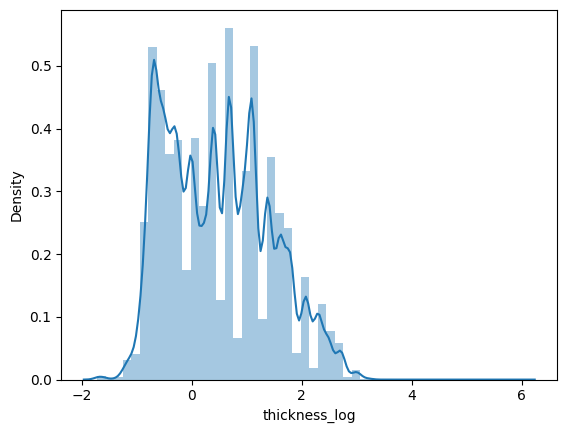

In [25]:
import numpy as np
df_p['selling_price_log'] = np.log(df_p['selling_price'])
sns.distplot(df_p['selling_price_log'])
plt.show()

df_p['quantity tons_log'] = np.log(df_p['quantity tons'])
sns.distplot(df_p['quantity tons_log'])
plt.show()

df_p['thickness_log'] = np.log(df_p['thickness'])
sns.distplot(df_p['thickness_log'])
plt.show()
# reverts log
# df_p['reverted_values'] = np.exp(df_p['selling_price_log'])
# sns.distplot(df_p['reverted_values'])
# plt.show()

In [26]:
df_p.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,6.468211,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,6.643790,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.357842,6.666354,1.386294


In [27]:
x=df_p[['quantity tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()


In [ ]:
"""seaborn heatmap or sns heatmap. The sns is short name use for seaborn python library.
 The heatmap especially uses to show 2D (two dimensional ) data in graphical format."""
"""Python seaborn heatmap is a graphical representation of 2D data.
 Each data value represents in a matrix and it has a special color show using sns.heatmap()"""
"""Using a heatmap to visualise a confusion matrix, time-series movements,
temperature changes, correlation matrix and SHAP interaction values. Heatmaps can bring your data to life.
 Versatile and eye-catching. There are many situations where they can highlight important relationships in your data."""


<Axes: >

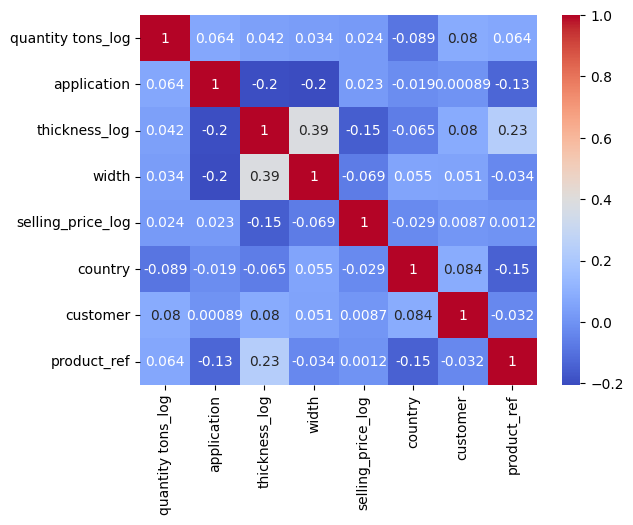

In [28]:
#sns.heatmap(x, annot=True, cmap="YlGnBu")
#sns.heatmap(x, annot=True, cmap="crest")
sns.heatmap(x, annot=True, cmap="coolwarm")

In [ ]:
"""DECISION TREE REGRESSOR
1 Encode categorical features
2 Test and Train split
3 Define Hyperparameters for GridSearchCV
4 Train the DecisionTreeRegressor with best parameters
5 Evalution metrics
6 Predict the selling price for new values
7 Save the DecisionTreeRegressor model"""


In [ ]:
"""Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems,
but mostly it is preferred for solving ..."""

"""NumPy library is an important foundational tool for studying Machine Learning.
 Many of its functions are very useful for performing any mathematical or scientific calculation.
 As it is known that mathematics is the foundation of machine learning, most of the mathematical tasks can be performed using NumPy."""

 """What is a sklearn in Python?
scikit-learn is an open-source Python library that implements a range of machine learning,
 pre-processing, cross-validation, and visualization algorithms using a unified interface.
Important features of scikit-learn: Simple and efficient tools for data mining and data analysis."""



In [ ]:
"""What is One Hot Encoding?
A one hot encoding is a representation of categorical variables as binary vectors.

This first requires that the categorical values be mapped to integer values.

Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1."""

"""Why Use a One Hot Encoding?
A one hot encoding allows the representation of categorical data to be more expressive.

Many machine learning algorithms cannot work with categorical data directly.
The categories must be converted into numbers. This is required for both input and output variables that are categorical."""

"""The fit_transform method from the sklearn. preprocessing class is used to preprocess the data for model training.
 The fit() method calculates the various required parameters,
 and the transform() method applies the calculated parameters to standardize the data."""

"""What is concatenate function with example?
The CONCATENATE function allows you to combine text from different cells into one cell.
In our example, we can use it to combine the text in column A and column B to create a combined name in a new column."""



In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

X=df_p[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=df_p['selling_price_log']
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()
# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# decision tree
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean squared error: 0.02294796722209703
R-squared: 0.92877085103458


In [30]:
# ['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [706.961582]


In [31]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

In [32]:
print(len(df_p))
df_p.head(3)

181620


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,6.468211,5.956169,-0.967584


In [33]:
df_c = df_p[df_p['status'].isin(['Won', 'Lost'])]
len(df_c)

150427

In [34]:
#DECISION TREE CLASSIFIER


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer

Y = df_c['status']
X= df_c[['quantity tons_log','selling_price_log','item type','application','thickness_log','width','country','customer','product_ref']]

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
be = LabelBinarizer()
be.fit(Y)
y = be.fit_transform(Y)
# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")


Accuracy: 0.9116200226018746
Confusion Matrix:
[[ 5689  1313]
 [ 1346 21738]]


Confusion Matrix:
[[ 5689  1313]
 [ 1346 21738]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      7002
           1       0.94      0.94      0.94     23084

    accuracy                           0.91     30086
   macro avg       0.88      0.88      0.88     30086
weighted avg       0.91      0.91      0.91     30086



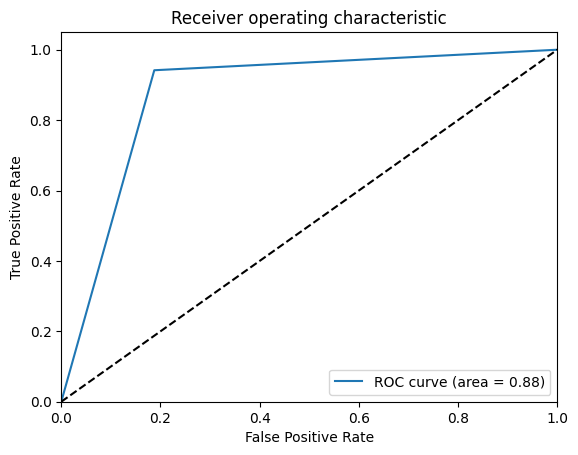

In [35]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [36]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


In [37]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)